<a href="https://colab.research.google.com/github/luisflorenz/jupyter_data/blob/main/sea_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sea Level Prediction Data

![](https://www.linkpicture.com/q/waves-gf934e29a7_1280.jpg)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

In [4]:
sea_df = pd.read_csv('./epa-sea-level.csv')
sea_df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


### data analysis

In [7]:
sea_df.info()
print(sea_df.shape)
print(sea_df.columns)
print(sea_df.describe())

print(sea_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB
(134, 5)
Index(['Year', 'CSIRO Adjusted Sea Level', 'Lower Error Bound',
       'Upper Error Bound', 'NOAA Adjusted Sea Level'],
      dtype='object')
              Year  CSIRO Adjusted Sea Level  Lower Error Bound  \
count   134.000000                134.000000         134.000000   
mean   1946.500000                  3.650341           3.204666   
std      38.826537                  2.485692           2.663781   
min    1880.000000                 -0.4409

In [13]:
def draw_plot():
  sea_df = pd.read_csv('./epa-sea-level.csv')


### Use matplotlib to create a scatter plot using the Year column as the x-axis and the CSIRO Adjusted Sea Level column as the y-axis.

Text(0, 0.5, 'CSIRO Adjusted Sea Level')

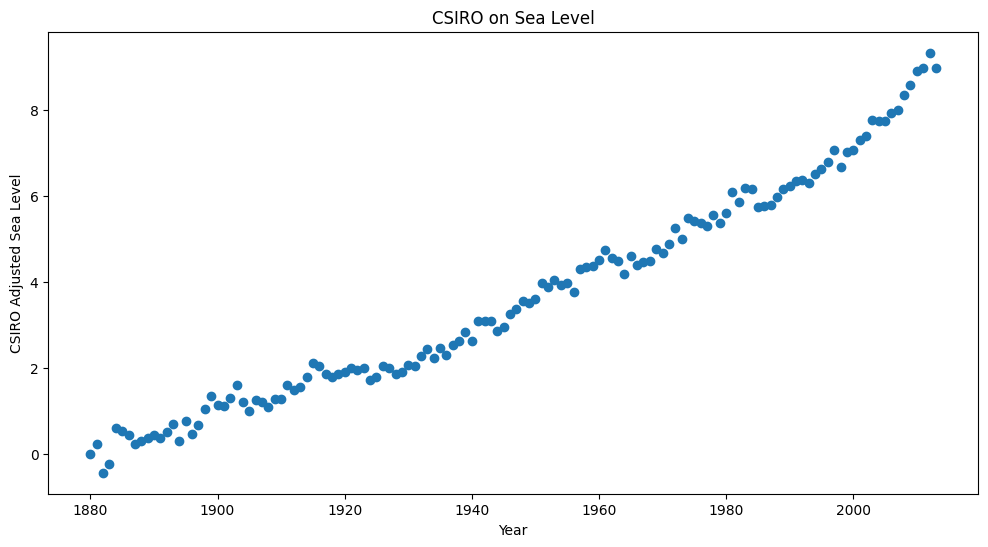

In [14]:
plt.figure( figsize=(12,6))
plt.scatter(x= sea_df.Year, y= sea_df['CSIRO Adjusted Sea Level'])
plt.title('CSIRO on Sea Level')
plt.xlabel('Year')
plt.ylabel('CSIRO Adjusted Sea Level')

### Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.

### first line of best fit

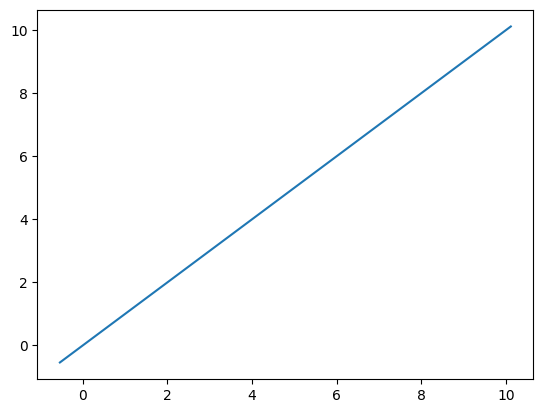

In [15]:
reg = linregress(sea_df['Year'], sea_df['CSIRO Adjusted Sea Level'])
pred_Ax = np.arange(sea_df['Year'].min(), 2050,1)
pred_Ay = pred_Ax*reg.slope + reg.intercept
plt.plot(pred_Ay, pred_Ay ,c='tab:red');

### Create second line of best fit

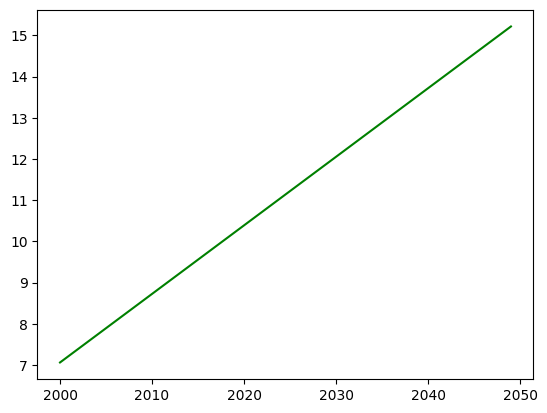

In [16]:
sea_2000 = sea_df[sea_df['Year'] >= 2000]

reg_b = linregress(sea_2000['Year'], sea_2000['CSIRO Adjusted Sea Level'])
pred_Bx = np.arange(2000, 2050, 1)
pred_By = pred_Bx*reg_b.slope + reg_b.intercept
plt.plot(pred_Bx, pred_By, c= 'green');

In [33]:
def draw_plot():
  sea_df = pd.read_csv('./epa-sea-level.csv')


  plt.subplots(figsize =(15,8));
  plt.scatter(x= sea_df.Year, y= sea_df['CSIRO Adjusted Sea Level'] ,color ='tab:blue'  )
  plt.title('CSIRO on Sea Level')
  plt.xlabel('Year')
  plt.ylabel('CSIRO Adjusted Sea Level')

  reg = linregress(sea_df['Year'], sea_df['CSIRO Adjusted Sea Level'])
  pred_Ax = np.arange(sea_df['Year'].min(), 2050,1)
  pred_Ay = pred_Ax*reg.slope + reg.intercept
  plt.plot(pred_Ax, pred_Ay ,c='tab:red');


  sea_2000 = sea_df[sea_df['Year'] >= 2000]
  reg_b = linregress(sea_2000['Year'], sea_2000['CSIRO Adjusted Sea Level'])
  pred_Bx = np.arange(2000, 2050, 1)
  pred_By = pred_Bx*reg_b.slope + reg_b.intercept
  plt.plot(pred_Bx, pred_By, c= 'green');

  plt.title("Rise in Sea Level");
  plt.xlabel("Year");
  plt.ylabel("Sea Level (inches)");

  plt.savefig('sea_level_plot.png')
  return plt.gca()







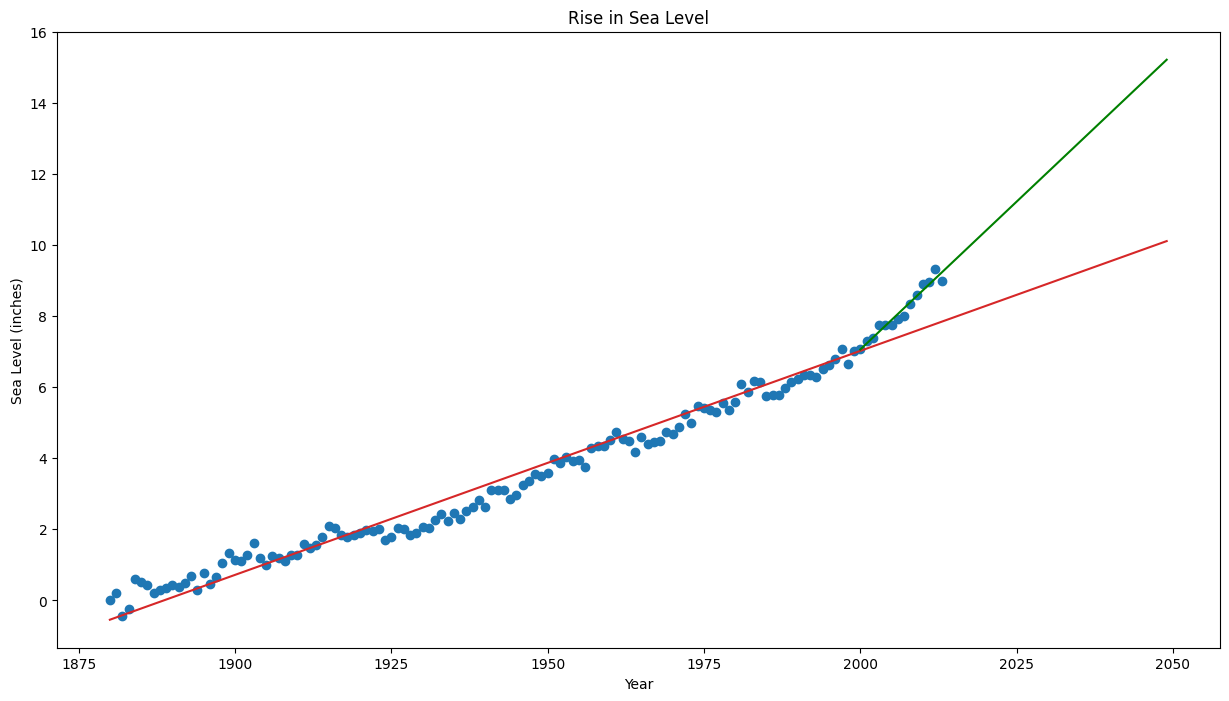

In [34]:
draw_plot();